## Problem Statement

The venerable insurance industry is no stranger to data driven decision making. Yet in today's rapidly transforming digital landscape, Insurance is struggling to adapt and benefit from new technologies compared to other industries, even within the BFSI sphere (compared to the Banking sector for example.) Extremely complex underwriting rule-sets that are radically different in different product lines, many non-KYC environments with a lack of centralized customer information base, complex relationship with consumers in traditional risk underwriting where sometimes customer centricity runs reverse to business profit, inertia of regulatory compliance - are some of the unique challenges faced by Insurance Business.

Despite this, emergent technologies like AI and Block Chain have brought a radical change in Insurance, and Data Analytics sits at the core of this transformation. We can identify 4 key factors behind the emergence of Analytics as a crucial part of InsurTech:

Big Data: The explosion of unstructured data in the form of images, videos, text, emails, social media
AI: The recent advances in Machine Learning and Deep Learning that can enable businesses to gain insight, do predictive analytics and build cost and time - efficient innovative solutions
Real time Processing: Ability of real time information processing through various data feeds (for ex. social media, news)
Increased Computing Power: a complex ecosystem of new analytics vendors and solutions that enable carriers to combine data sources, external insights, and advanced modeling techniques in order to glean insights that were not possible before.
This dataset can be helpful in a simple yet illuminating study in understanding the risk underwriting in Health Insurance, the interplay of various attributes of the insured and see how they affect the insurance premium.

Content
This dataset contains 1338 rows of insured data, where the Insurance charges are given against the following attributes of the insured: Age, Sex, BMI, Number of Children, Smoker and Region. There are no missing or undefined values in the dataset.

Inspiration
This relatively simple dataset should be an excellent starting point for EDA, Statistical Analysis and Hypothesis testing and training Linear Regression models for predicting Insurance Premium Charges.

#### Proposed tasks

1. Exploratory Data Analytics
2. Statistical hypothesis testing
3. Statistical Modeling
4. Linear Regression

This is a regression problem

#### Importing the required libraries

In [1]:
import os 
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import tree
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot

import graphviz

import seaborn as sns

import math

### Reading the data

In [7]:
insurance = pd.read_csv('insurance.csv')

print(insurance.shape)
insurance.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Overview of the data

In [11]:
import pandas_profiling

In [12]:
pandas_profiling.ProfileReport(insurance)

### Understanding the data

In [13]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [17]:
insurance.columns.groupby(insurance.dtypes)

{dtype('int64'): Index(['age', 'children'], dtype='object'),
 dtype('float64'): Index(['bmi', 'charges'], dtype='object'),
 dtype('O'): Index(['sex', 'smoker', 'region'], dtype='object')}

In [8]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [41]:
insurance.describe(include = 'object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [18]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Understanding the distribution of the features

In [34]:
def summary(x):
    x_min = insurance[x].min()
    x_max = insurance[x].max()
    Q1 = insurance[x].quantile(0.25)
    Q2 = insurance[x].quantile(0.50)
    Q3 = insurance[x].quantile(0.75)
    print(f'5 Point Summary of {x.capitalize()} Attribute:\n'
          f'{x.capitalize()}(min) : {x_min}\n'
          f'Q1                    : {Q1}\n'
          f'Q2(Median)            : {Q2}\n'
          f'Q3                    : {Q3}\n'
          f'{x.capitalize()}(max) : {x_max}')

    fig = plt.figure(figsize=(16, 10))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('pastel')
    
    plt.subplot(221)
    ax1 = sns.distplot(insurance[x], color = 'r')
    plt.title(f'{x.capitalize()} Density Distribution')
    
    plt.subplot(222)
    ax2 = sns.violinplot(x = insurance[x], palette = 'Accent', split = True)
    plt.title(f'{x.capitalize()} Violinplot')
    
    plt.subplot(223)
    ax2 = sns.boxplot(x=insurance[x], palette = 'cool', width=0.7, linewidth=0.6)
    plt.title(f'{x.capitalize()} Boxplot')
    
    plt.subplot(224)
    ax3 = sns.kdeplot(insurance[x], cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')
    
    plt.show()

In [35]:
def box_plot(x = 'bmi'):
    def add_values(bp, ax):
        """ This actually adds the numbers to the various points of the boxplots"""
        for element in ['whiskers', 'medians', 'caps']:
            for line in bp[element]:
                # Get the position of the element. y is the label you want
                (x_l, y),(x_r, _) = line.get_xydata()
                # Make sure datapoints exist 
                # (I've been working with intervals, should not be problem for this case)
                if not np.isnan(y): 
                    x_line_center = x_l + (x_r - x_l)/2
                    y_line_center = y  # Since it's a line and it's horisontal
                    # overlay the value:  on the line, from center to right
                    ax.text(x_line_center, y_line_center, # Position
                            '%.2f' % y, # Value (3f = 3 decimal float)
                            verticalalignment='center', # Centered vertically with line 
                            fontsize=12, backgroundcolor="white")

    fig, axes = plt.subplots(1, figsize=(4, 8))

    red_diamond = dict(markerfacecolor='r', marker='D')

    bp_dict = insurance.boxplot(column = x, 
                             grid=True, 
                             figsize=(4, 8), 
                             ax=axes, 
                             vert = True, 
                             notch=False, 
                             widths = 0.7, 
                             showmeans = True, 
                             whis = 1.5,
                             flierprops = red_diamond,
                             boxprops= dict(linewidth=3.0, color='black'),
                             whiskerprops=dict(linewidth=3.0, color='black'),
                             return_type = 'dict')

    add_values(bp_dict, axes)

    plt.title(f'{x.capitalize()} Boxplot', fontsize=16)
    plt.ylabel(f'{x.capitalize()}', fontsize=14)
    plt.show()
    
    skew = insurance[x].skew()
    Q1 = insurance[x].quantile(0.25)
    Q3 = insurance[x].quantile(0.75)
    IQR = Q3 - Q1
    total_outlier_num = ((insurance[x] < (Q1 - 1.5 * IQR)) | (insurance[x] > (Q3 + 1.5 * IQR))).sum()
    print(f'Mean {x.capitalize()} = {insurance[x].mean()}')
    print(f'Median {x.capitalize()} = {insurance[x].median()}')
    print(f'Skewness of {x}: {skew}.')
    print(f'Total number of outliers in {x} distribution: {total_outlier_num}.')   

#### Distribution of Age

5 Point Summary of Age Attribute:
Age(min) : 18
Q1                    : 27.0
Q2(Median)            : 39.0
Q3                    : 51.0
Age(max) : 64


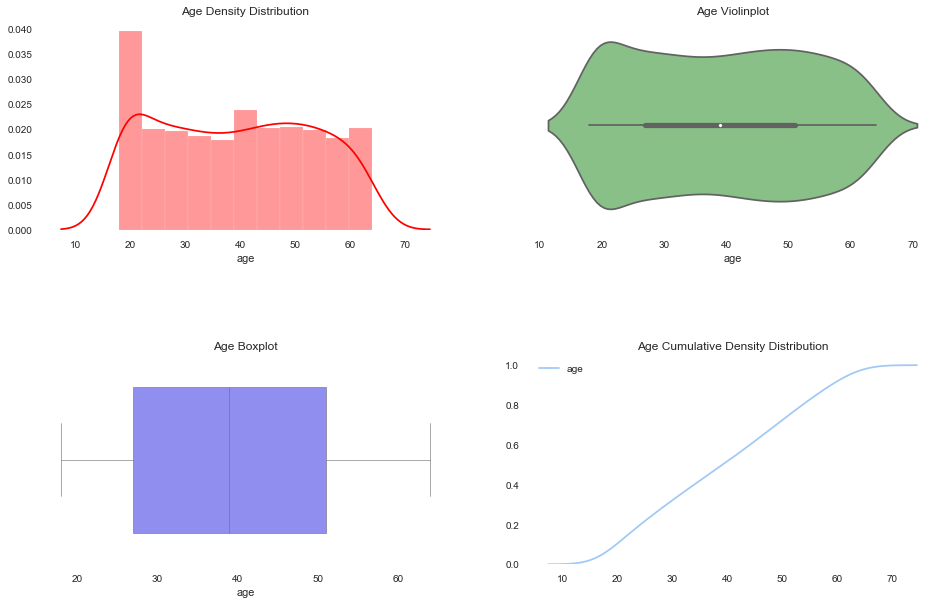

In [36]:
summary('age')

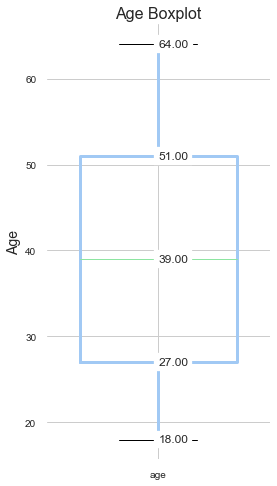

Mean Age = 39.20702541106129
Median Age = 39.0
Skewness of age: 0.05567251565299186.
Total number of outliers in age distribution: 0.


In [38]:
box_plot('age')

#### Distribution of BMI

5 Point Summary of Bmi Attribute:
Bmi(min) : 15.96
Q1                    : 26.29625
Q2(Median)            : 30.4
Q3                    : 34.69375
Bmi(max) : 53.13


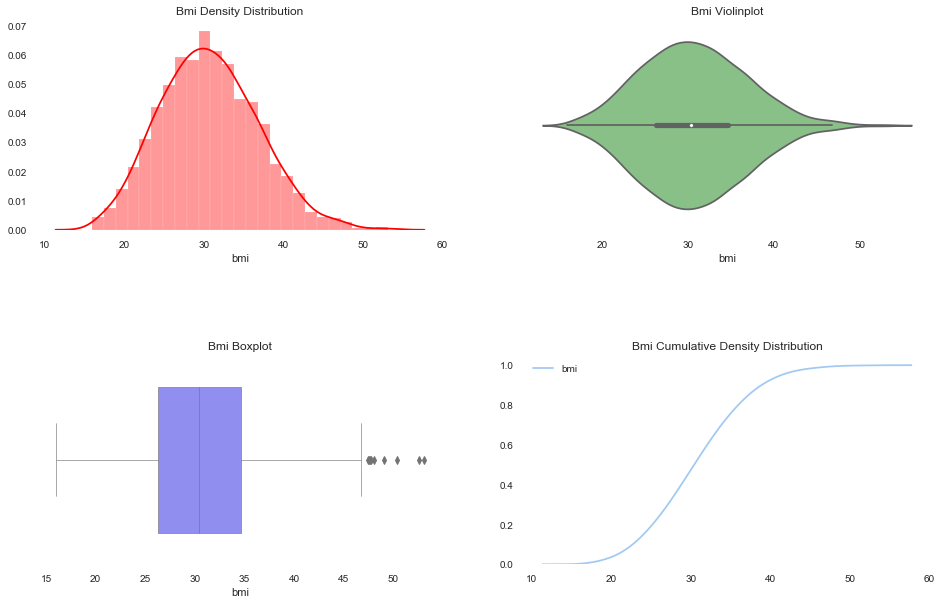

In [39]:
summary('bmi')

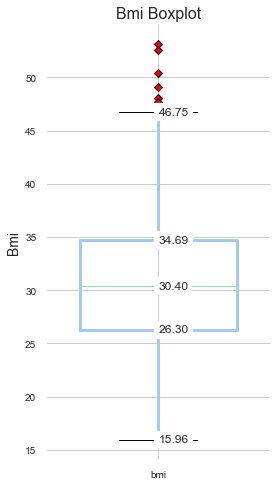

Mean Bmi = 30.663396860986538
Median Bmi = 30.4
Skewness of bmi: 0.2840471105987448.
Total number of outliers in bmi distribution: 9.


In [40]:
box_plot('bmi')

#### Distribution of charges

5 Point Summary of Charges Attribute:
Charges(min) : 1121.8739
Q1                    : 4740.28715
Q2(Median)            : 9382.033
Q3                    : 16639.912515
Charges(max) : 63770.42801


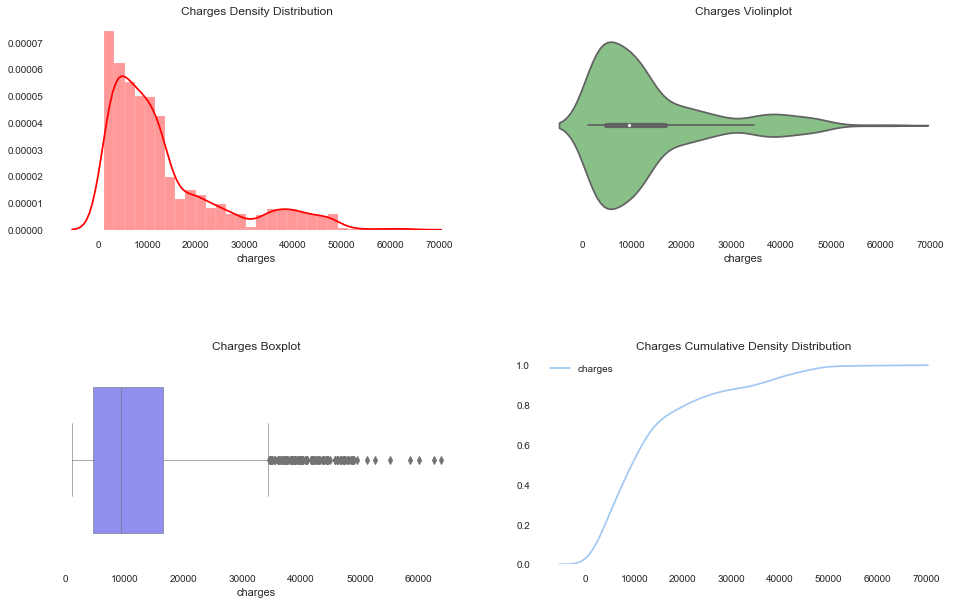

In [44]:
summary('charges')

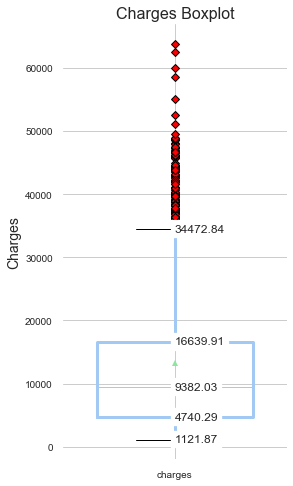

Mean Charges = 13270.422265141257
Median Charges = 9382.033
Skewness of charges: 1.5158796580240388.
Total number of outliers in charges distribution: 139.


In [45]:
box_plot('charges')

#### Distribution of categorical variables

##### Distribution of sex

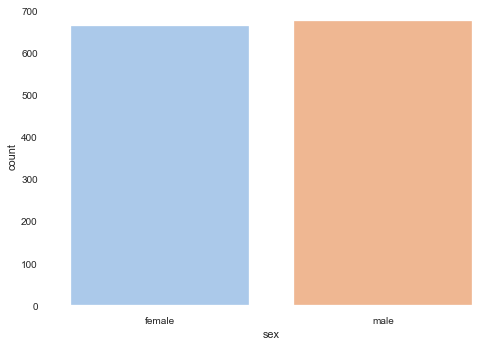

In [46]:
sns.countplot(x = 'sex', data = insurance)

##### Distribution of children

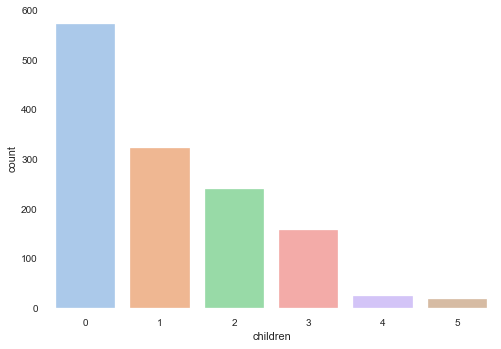

In [47]:
sns.countplot(x = 'children', data = insurance)

##### Distribution of smoker

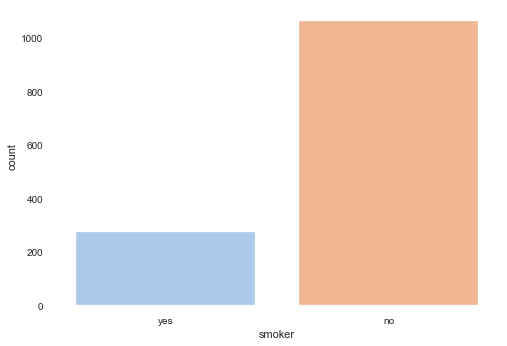

In [48]:
sns.countplot(x = 'smoker', data = insurance)

##### Distribution of region

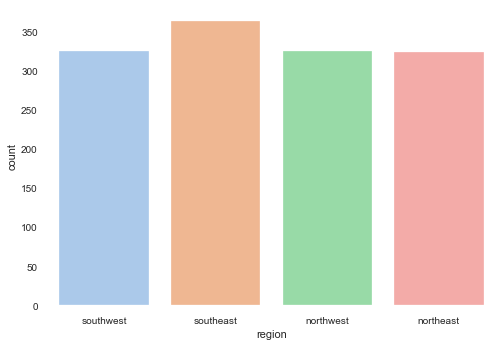

In [49]:
sns.countplot('region', data = insurance)

#### Correlation plot

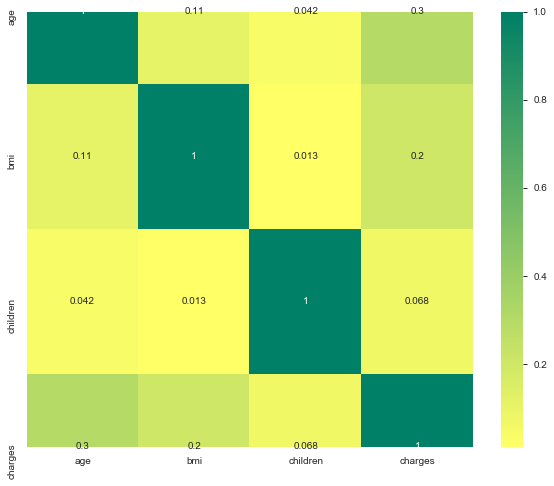

In [53]:
corr = insurance.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap = 'summer_r')

### Hypothesis testing

In [54]:
smokers = insurance[insurance['smoker'] == 0]
nonsmokers = insurance[insurance['smoker'] == 1]
charge_smokers = smokers['charges']
charge_nonsmokers = nonsmokers['charges']

print(f'Number of smokers: {smokers.shape[0]}')
print(f'Variance in charges of smokers: {np.var(charge_smokers)}')
print(f'Number of non - smokers: {nonsmokers.shape[0]}')
print(f'Variance in charges of non - smokers: {np.var(charge_nonsmokers)}')

Number of smokers: 0
Variance in charges of smokers: nan
Number of non - smokers: 0
Variance in charges of non - smokers: nan


In [55]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(charge_smokers, charge_nonsmokers, equal_var=False)
print(f't_statistic: {t_statistic}\np_value: {p_value}')


t_statistic: nan
p_value: nan


In [56]:
print ("two-sample t-test p-value=", p_value)

two-sample t-test p-value= nan


In [57]:
p_value > 0.05

False